In [ ]:
import torch
from pathlib import Path
from PIL import Image
from IPython.display import display

In [ ]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 17075, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 17075 (delta 29), reused 34 (delta 17), pack-reused 17022 (from 1)
Receiving objects: 100% (17075/17075), 15.68 MiB | 16.24 MiB/s, done.
Resolving deltas: 100% (11719/11719), done.


In [2]:
%cd yolov5

/content/yolov5


In [3]:
!pip install -r requirements.txt

In [4]:
def load_model(model_path):
    print("Loading model...")
    model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True)
    print("Model loaded successfully.")
    return model

In [5]:
def detect_fire(model, image_path):
    print(f"Running inference on {image_path}...")
    results = model(image_path)
    results.print()

    results.save(save_dir='output')
    output_image_path = Path('output') / Path(image_path).name
    display(Image.open(output_image_path))

    detections = results.pandas().xyxy[0]
    if len(detections) > 0:
        print("Fire detected in the image.")
    else:
        print("No fire detected in the image.")

In [6]:
MODEL_PATH = '/content/trained-weight.pt'

In [7]:
model = load_model(MODEL_PATH)

Loading model...


Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2024-12-13 Python-3.10.12 torch-2.5.1+cu121 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


Model loaded successfully.


In [8]:
IMAGE_PATH = '/content/fire-image.jpg'

Running inference on /content/fire-image.jpg...


/root/.cache/torch/hub/ultralytics_yolov5_master/models/common.py:892: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):
image 1/1: 416x416 2 fires
Speed: 28.1ms pre-process, 376.1ms inference, 19.9ms NMS per image at shape (1, 3, 640, 640)
Saved 1 image to output


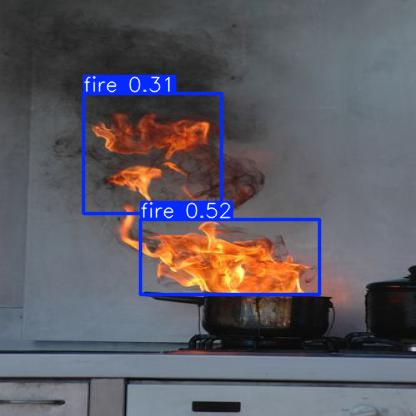

Fire detected in the image.


In [9]:
detect_fire(model, IMAGE_PATH)